# Esteban and Ray Polarization Measure Simulation

The goal of this jupyter notebook is to show how polarization values vary with the axioms presented in Esteban and Ray's article.

## Axiom 1
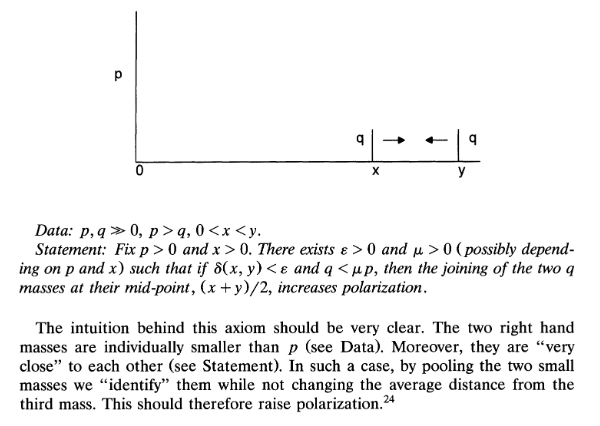
## Axiom 2
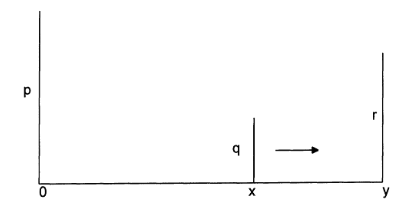
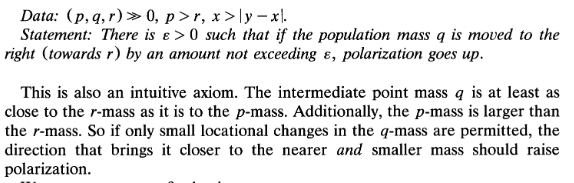
## Axiom 3
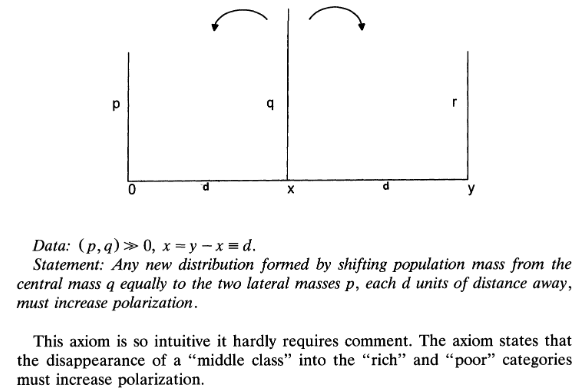


# Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from statsmodels.stats.weightstats import DescrStatsW
from ipywidgets import BoundedIntText,  IntText, interact, FloatSlider
import time
from IPython import display
%matplotlib inline

In [ ]:
def polarization(pi: list, y: list, a=1.6) -> float:
    assert(len(pi) == len(y))
    ans = 0
    for i in range(len(pi)):
        for j in range(len(pi)):
            ans += ((pi[i]**(1+a)) * pi[j]) * abs(y[i] - y[j])
    return ans

Add any other example below

In [ ]:
axioms_freqs = {
                "AX1": [[10, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5],
                        [10, 0, 0, 0, 0, 0, 4, 1, 0, 1, 4],
                        [10, 0, 0, 0, 0, 0, 3, 1, 2, 1, 3],
                        [10, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2],
                        [10, 0, 0, 0, 0, 0, 1, 1, 6, 1, 1],
                        [10, 0, 0, 0, 0, 0, 0, 1, 8, 1, 0],
                        [10, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0]],

                "AX2": [[10, 0, 0, 0, 0, 0, 3, 0, 0, 0, 7],
                        [10, 0, 0, 0, 0, 0, 2, 1, 0, 0, 7],
                        [10, 0, 0, 0, 0, 0, 1, 1, 1, 0, 7],
                        [10, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7],
                        [10, 0, 0, 0, 0, 0, 0, 0, 1, 1, 8],
                        [10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9],
                        [10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10]],

                "AX3": [[0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 18, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 1, 16, 1, 1, 0, 0, 0],
                        [0, 0, 1, 1, 1, 14, 1, 1, 1, 0, 0],
                        [0, 1, 1, 1, 1, 12, 1, 1, 1, 1, 0],
                        [1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1],
                        [2, 1, 1, 1, 1, 8, 1, 1, 1, 1, 2],
                        [3, 1, 1, 1, 1, 6, 1, 1, 1, 1, 3],
                        [4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4],
                        [5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5],
                        [6, 1, 1, 1, 1, 0, 1, 1, 1, 1, 6],
                        [7, 1, 1, 1, 0, 0, 0, 1, 1, 1, 7],
                        [8, 1, 1, 0, 0, 0, 0, 0, 1, 1, 8],
                        [9, 1, 0, 0, 0, 0, 0, 0, 0, 1, 9],
                        [10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10]],

                "EX1": [[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10],
                        [0, 10, 0, 0, 0, 0, 0, 0, 0, 10, 0],
                        [0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 0],
                        [0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 0],
                        [0, 0, 0, 0, 10, 0, 10, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0]]
                }

In [ ]:
STATS = {"SPREAD": [],
         "SD": [],
         "VAR": [],
         "POLARIZATION": []}

def calcSpread(x: list, y: list) -> float:

    l = max(x)
    r = min(x)

    for i in range(len(x)):
        if y[i] > 0:
            if x[i] < l:
                l = x[i]
            elif x[i] > r:
                r = x[i]
    return r-l if r > l else 0

def calcCoverage(x: list, y: list) -> float:
    ans = 0
    for b in y:
        if b == 0:
            ans += 1
    return ans



In [ ]:
SLEEP_TIME = 1
# Number of Bins
GROUPS = 11
VALUES = np.arange( 0.5, GROUPS, 1.0 )
alpha = 1.6
Y_MAX = 0

def graph_bins(FREQS) -> None:

    global STATS

    # Object for the descriptive statistics values
    M = DescrStatsW(VALUES, weights = FREQS)

    # Plots an histogram with current values and freqs.
    plt.hist(VALUES, bins = range(GROUPS + 1), weights = FREQS)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    p = polarization(FREQS, VALUES, alpha)

    if sum(FREQS) > 0:
        STATS["SPREAD"].append(calcSpread(VALUES, FREQS))
        STATS["DISPERSION"].append(M.var)
        STATS["COVERAGE"].append(calcCoverage(VALUES, FREQS))
        STATS["POLARIZATION"].append(p)
        print( "SPREAD =", STATS["SPREAD"][-1] )
        print( "DISPERSION =", STATS["DISPERSION"][-1] )
        print( "COVERAGE =", STATS["COVERAGE"][-1])
        print( "POLARIZATION =", p)
    else:
        print( "SPREAD = undefined" )
        print( "DISPERSION = undefined" )
        print( "COVERAGE = undefined")
        print( "POLARIZATION =", p)

    plt.ylim([0, Y_MAX+0.5])

    plt.show()

def plot_stats():

    t = [i for i in range(len(STATS["SPREAD"]))]
    fig, ax = plt.subplots()
    for s in STATS:
        ax.plot(t, STATS[s], marker=".", label=s)
    ax.set_xticks(t)
    ax.set_xlabel("time units")
    ax.set_ylabel("polarization measures")
    plt.legend()
    #from google.colab import files
    #plt.savefig("plot.png", dpi=300)
    #files.download("plot.png")
    plt.show()


def simulate(axiom: str):
    if axiom == "NONE":
        return
    global STATS, Y_MAX
    STATS = {"SPREAD": [],
             "DISPERSION": [],
             "COVERAGE": [],
             "POLARIZATION": []}
    Y_MAX = np.max(axioms_freqs[axiom])
    for freqs in axioms_freqs[axiom]:
        graph_bins(freqs)
        time.sleep(SLEEP_TIME)
    normalize_polarization()
    plot_stats()

def normalize_polarization():
    global STATS
    m = 0
    for s in set(STATS) - {"POLARIZATION"}:
        m = max(m, max(STATS[s]))

    maxP = max(STATS["POLARIZATION"])
    for i in range(len(STATS["POLARIZATION"])):
        current = STATS["POLARIZATION"][i]
        STATS["POLARIZATION"][i] = (current/maxP) * m

def update_alpha(a: float) -> None:
    global alpha
    alpha = a

interact(update_alpha, a=FloatSlider(
    min=0.1, max=1.6, step=0.1, value=1.6, title='Alpha'));
interact(simulate, axiom=[('None', "NONE"),
                          ('Axiom 1', "AX1"),
                          ('Axiom 2', "AX2"),
                          ('Axiom 3', "AX3"),
                          ('Example 1', "EX1")]);


interactive(children=(FloatSlider(value=1.6, description='a', max=1.6, min=0.1), Output()), _dom_classes=('wid…

interactive(children=(Dropdown(description='axiom', options=(('None', 'NONE'), ('Axiom 1', 'AX1'), ('Axiom 2',…